<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/%C6%8Fhm%C9%99dli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Əhmədli" supermarketidagi savdo holati


In [165]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [166]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/%C6%8Fhm%C9%99dli.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,TACH TRUBUCKA 50-LI KORUKLU,Idish-tovoq,0.80,2019-10-30,False
1,BABAYEVSKIY 100GR SOKOLAD FIRMENNIY PLITKA,Shirinliklar,2.35,2019-10-30,False
2,FINAL 910GR ANA BALA ERIDILMIS BITKI YAGI D/Q,Yog'lar,4.25,2019-10-30,False
3,CUPIDO 200GR ROYAL MINTS PORTAGAL QUTU,Shirinliklar,6.85,2019-10-30,False
4,TEK SAP,Idish-tovoq,0.60,2019-10-30,False
5,SEDRAYA ZEMLYA 700GR NOXUD PAKET,Donli mahsulotlar,2.75,2019-10-30,False
6,PECENYE SOYUZ KOND.ELITNOE OVSYANOE SOKOLADLI KG,Shirinliklar,6.40,2019-10-30,False
7,XAMA 25% RB KG,Smetana,4.05,2019-10-30,False
8,BERRAK 720ML XIYAR TURSUSU NO:1,Tuzlamalar,3.05,2019-09-06,False
9,BERQA 225GR BERQAMOT ETIRLI CAY D/Q,Choy,6.90,2019-09-06,False


In [167]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20968 entries, 0 to 20967
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20968 non-null  object 
 1   mahsulot_turi   20968 non-null  object 
 2   mahsulot_narhi  20968 non-null  float64
 3   sotilgan_vaqti  20968 non-null  object 
 4   bonus_karta     20968 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 675.9+ KB


In [168]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [169]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20968 entries, 0 to 20967
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20968 non-null  object        
 1   mahsulot_turi   20968 non-null  object        
 2   mahsulot_narhi  20968 non-null  float64       
 3   sotilgan_vaqti  20968 non-null  datetime64[ns]
 4   bonus_karta     20968 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 675.9+ KB


In [170]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2125
1751
2156
1934
2232
2117
2319
2094
2078
2151
11
0


In [171]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2125
1751
2156
1934
2232
2117
2319
2094
2078
2151
0
0


In [172]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,TACH TRUBUCKA 50-LI KORUKLU,Idish-tovoq,0.80,2019-10-30,False
1,BABAYEVSKIY 100GR SOKOLAD FIRMENNIY PLITKA,Shirinliklar,2.35,2019-10-30,False
2,FINAL 910GR ANA BALA ERIDILMIS BITKI YAGI D/Q,Yog'lar,4.25,2019-10-30,False
3,CUPIDO 200GR ROYAL MINTS PORTAGAL QUTU,Shirinliklar,6.85,2019-10-30,False
4,TEK SAP,Idish-tovoq,0.60,2019-10-30,False
...,...,...,...,...,...
20963,AVIKO 2500GR PREMIUM SUPER CRUNCH KARTOF POSET,Konservalar,9.55,2019-09-22,False
20964,"ULUDAG 0,33 LT ERIKLI DOGAL KAYNAK SUYU",Suvlar,0.65,2019-09-22,False
20965,SOSISKA BOL ET HISE VERILMIS KG,Kolbasa va sosiskalar,9.10,2019-09-22,False
20966,MILLA 175GR XAMA 20% PL/Q,Smetana,1.37,2019-09-22,False


In [173]:
#9 2019-yilda "Əhmədli" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4777
Maishiy buyumlar,1174
"Yuvish vositalari, tozalagichlar",1024
Mevali sharbatlar,957
Idish-tovoq,792
...,...
Nonushta,27
Kefir,24
Shampan,15
Tayyor ovqatlar,14


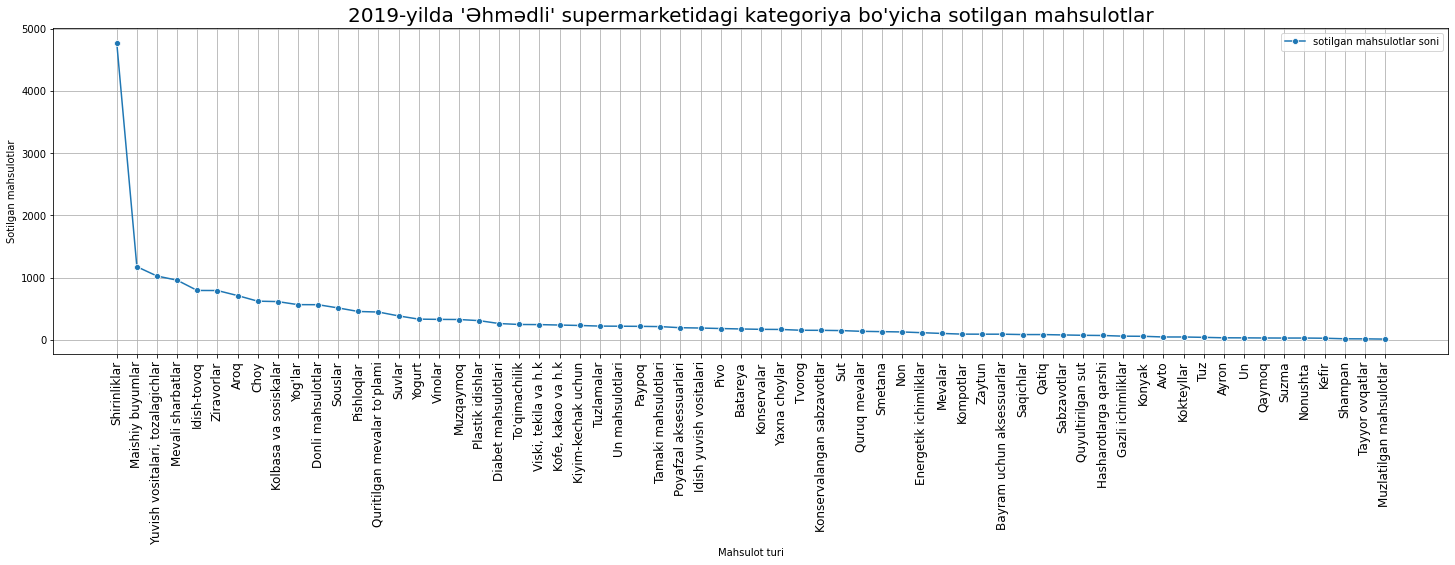

In [174]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Əhmədli' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [175]:
#10 2019-yilda "Əhmədli" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,11190.17
Avto,227.05
Ayron,22.16
Batareya,732.60
Bayram uchun aksessuarlar,251.40
...,...
Yog'lar,5163.71
Yogurt,410.27


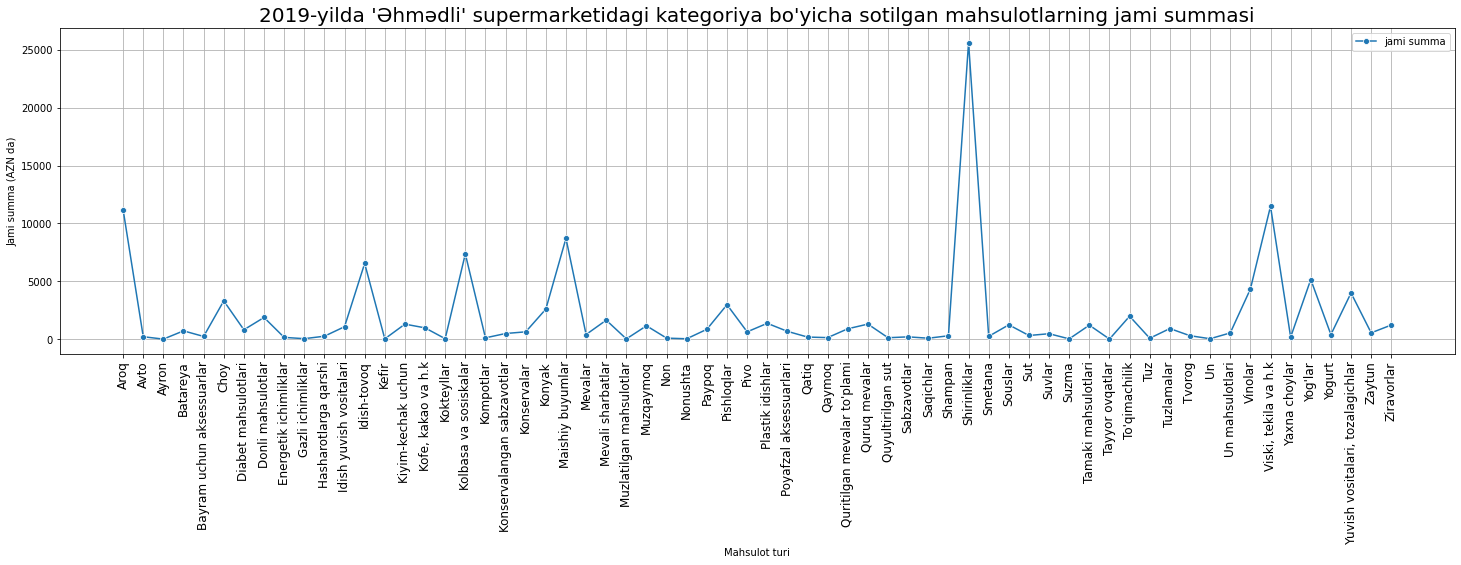

In [176]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Əhmədli' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [177]:
#11 2019-yilda "Əhmədli" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10723,10234


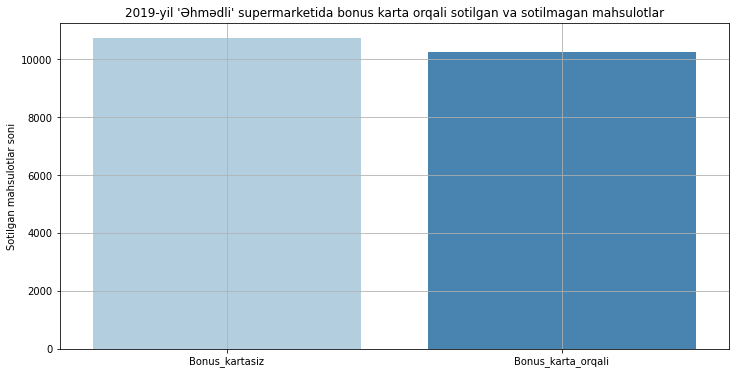

In [178]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Əhmədli' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [179]:
#12 2019-yilda "Əhmədli" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2125
Fevral,1751
Mart,2156
Aprel,1934
May,2232
Iyun,2117
Iyul,2319
Avgust,2094
Sentabr,2078
Oktabr,2151


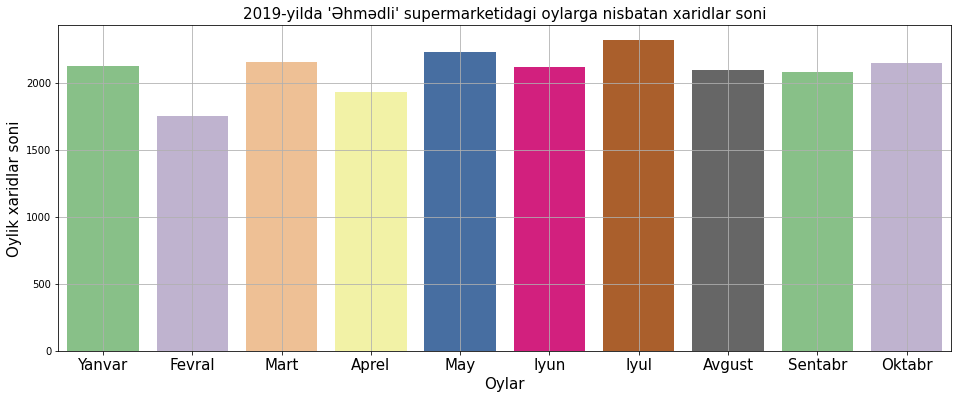

In [180]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Əhmədli' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [181]:
#13 2019-yilda "Əhmədli" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2932
Seshanba,2906
Chorshanba,3031
Payshanba,3016
Juma,3157
Shanba,2993
Yakshanba,2922


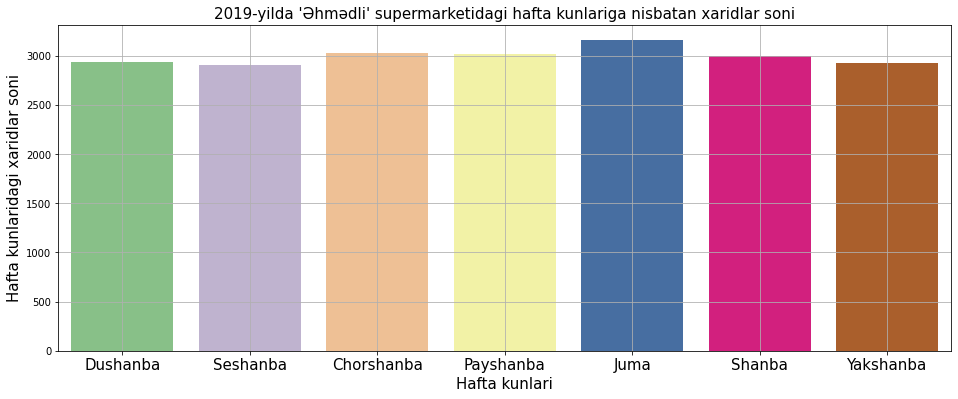

In [182]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Əhmədli' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [183]:
#14 2019-yilda "Əhmədli" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,707
2,750
3,600
4,793
5,583
6,758
7,608
8,741
9,638
10,609


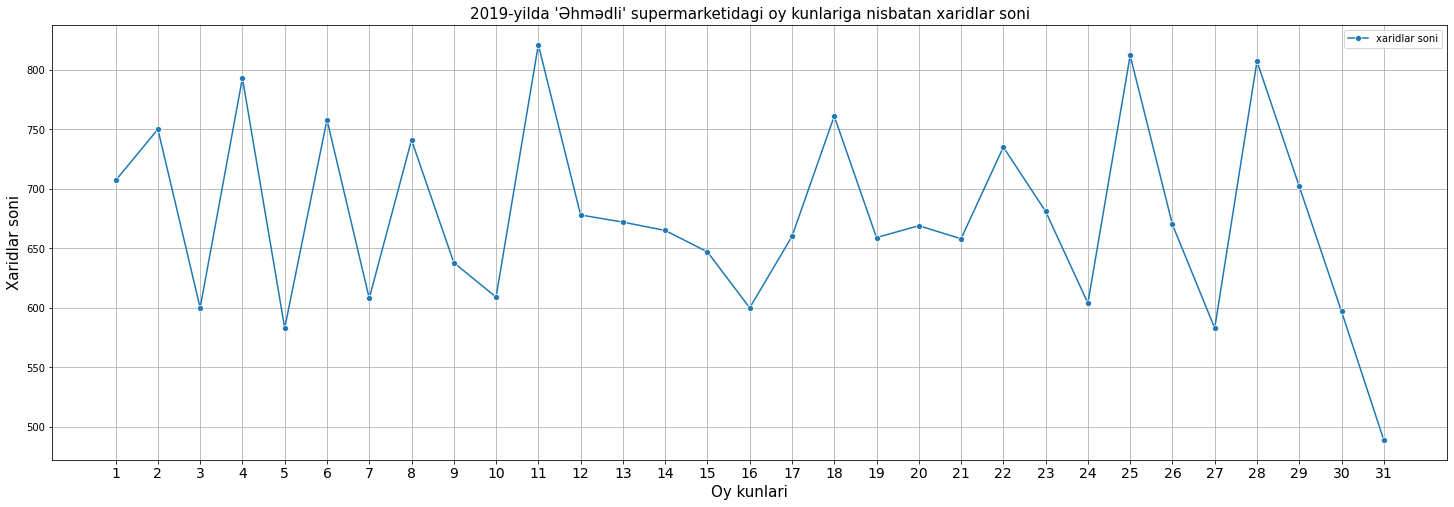

In [184]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Əhmədli' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [185]:
#15 2019-yil 'Əhmədli' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [186]:
len(oy_sanalari)

310

In [187]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [188]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [189]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,47,82,48,89,68,92,92,80,69,70,82,42,66,92,88,38,46,65,110,31,73,93,64,30,67,56,56,66,69,91,63
Fevral,40,76,64,46,45,57,62,64,29,55,90,41,91,45,43,52,82,114,20,91,52,72,92,70,62,86,20,90,0,0,0
Mart,90,101,77,86,60,83,84,75,60,52,69,35,49,89,79,74,62,48,38,38,56,83,90,54,82,52,62,86,61,55,126
Aprel,69,78,46,50,48,103,60,59,99,55,89,69,70,76,20,40,66,73,83,55,69,51,60,69,58,64,62,61,58,74,0
May,57,77,78,50,60,52,43,76,100,95,87,75,44,68,71,79,50,96,85,53,83,85,27,39,70,59,92,85,119,60,117
Iyun,90,83,61,70,88,61,59,75,69,60,87,85,42,87,58,67,54,84,99,82,58,57,79,67,107,43,46,84,62,53,0
Iyul,49,71,63,84,43,62,50,93,46,53,77,93,84,51,101,60,66,82,67,126,80,92,55,91,104,87,72,98,90,48,81
Avgust,101,39,76,75,77,126,37,71,67,83,78,79,76,55,53,73,77,57,29,56,65,84,45,58,71,62,51,84,73,60,56
Sentabr,46,53,38,114,52,78,59,84,31,42,52,109,97,43,85,79,85,70,67,70,90,51,100,40,66,97,61,50,88,81,0
Oktabr,118,90,49,129,42,44,62,64,68,44,110,50,53,59,49,38,72,72,61,67,32,67,69,86,125,64,61,103,82,75,46


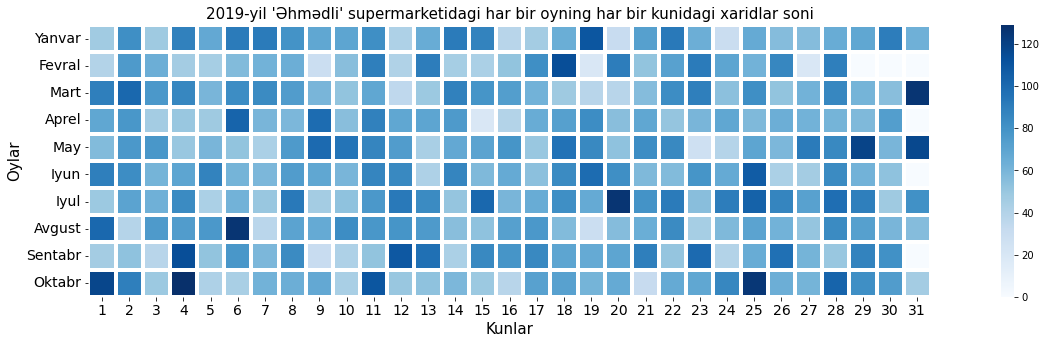

In [190]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Əhmədli' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

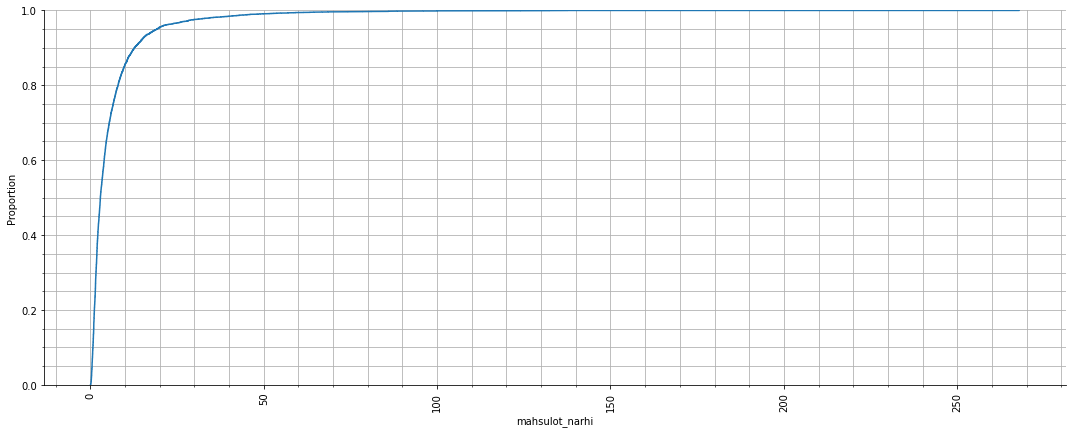

In [191]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()